In [119]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import warnings
warnings.filterwarnings('ignore')



#Installing pmdarima package
!pip install pmdarima





# Importing auto_arima 
from pmdarima.arima import auto_arima


In [120]:
sales_data = pd.read_csv("https://raw.githubusercontent.com/SushmithaPulagam/TimeSeries_Auto-ARIMA/master/Champagne%20Sales.csv")

In [121]:
#sales_data = pd.read_csv("/content/resign.csv")

In [122]:
sales_data.head()

,Month,Champagne sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [123]:
#Convert the month column to datetime
sales_data['Month']=pd.to_datetime(sales_data['Month'])

In [124]:
#Set the index of the Month 
sales_data.set_index('Month',inplace=True)

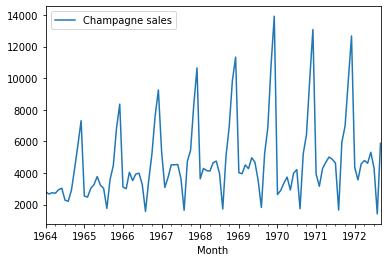

In [125]:
# To understand the pattern
sales_data.plot()

In [126]:
#Testing for stationarity
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(sales_data)

(0.01, False)

In [127]:
len(sales_data)

105

In [128]:
#Spliting the dataset into train and test
train = sales_data[:88]
test = sales_data[-20:]

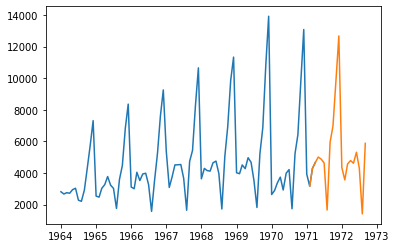

In [129]:
plt.plot(train)
plt.plot(test)

In [130]:
arima_model =  auto_arima(train['Champagne sales'],start_p=0, d=1, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=1, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=12, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1252.348, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1238.975, Time=0.14 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1224.483, Time=0.71 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1223.602, Time=0.13 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1224.056, Time=0.47 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1224.698, Time=0.83 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1222.767, Time=0.46 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=1221.433, Time=1.31 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1220.696, Time=2.69 sec
 ARIMA(1,1,1)(3,1,0)[12]             : AIC=1222.224, Time=5.53 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=inf, Time=6.77 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=1221.857, Time=2.56 sec
 ARIMA(1,1,1)(3,1,1)[12]             : AIC=inf, Time=10.27 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1223.275, Time=1.95 sec
 ARIMA(1,1,0)(2,1,0)[12]    

In [131]:
#Summary of the model
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   88
Model:             SARIMAX(0, 1, 2)x(2, 1, [], 12)   Log Likelihood                -605.177
Date:                             Sat, 29 Jan 2022   AIC                           1220.354
Time:                                     17:39:34   BIC                           1231.942
Sample:                                          0   HQIC                          1224.981
                                              - 88                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6703      0.092     -7.259      0.000      -0.851      -0.489
ma.L2         -0.2441      0.084     -2.891      0.004      -0.410      -0.079
ar.S.L12      -0.1793      0.097     -1.847      0.065      -0.370       0.011
ar.S.L24       0.1983      0.088      2.255      0.024       0.026       0.371
sigma2       5.38e+05   7.24e+04      7.433      0.000    3.96e+05     6.8e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.44   Jarque-Bera (JB):                 4.39
Prob(Q):                              0.51   Prob(JB):                         0.11
Heteroskedasticity (H):               1.88   Skew:                             0.01
Prob(H) (two-sided):                  0.12   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [132]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 20),index=test.index)
prediction.columns = ['predicted_sales']
prediction


,predicted_sales
Month,
1971-02-01,3547.327193
1971-03-01,4126.520852
1971-04-01,4036.542870
1971-05-01,1803.989120
1971-06-01,5287.355838
1971-07-01,6526.096968
1971-08-01,10233.435439
1971-09-01,13770.991304
1971-10-01,3460.321825


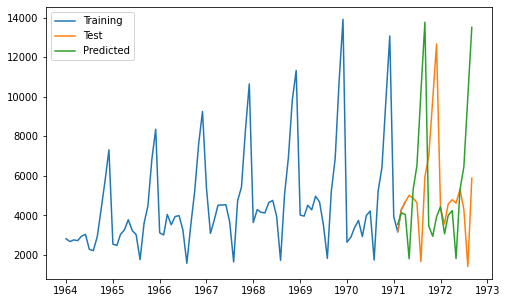

In [133]:
plt.figure(figsize=(8,5))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
plt.legend(loc = 'Left corner')
plt.show()


In [134]:
from sklearn.metrics import r2_score
test['predicted_sales'] = prediction
r2_score(test['Champagne sales'], test['predicted_sales'])

-2.6179388590679924

In [135]:
from pandas.tseries.offsets import DateOffset
import datetime as dt
import pandas as pd
future_dates=[sales_data.index[-1]+ DateOffset(months=x)for x in range(0,60)]

In [136]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=sales_data.columns)

In [137]:
future_datest_df.tail()

,Champagne sales
1977-04-01,NaN
1977-05-01,NaN
1977-06-01,NaN
1977-07-01,NaN
1977-08-01,NaN


In [138]:
future_df=pd.concat([sales_data,future_datest_df])

In [139]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(sales_data['Champagne sales'],order=(0, 1, 2),seasonal_order=(2,1,0,12))
results=model.fit()

In [148]:
length=(len(sales_data))
month = 12
year = 10
time = month * year
print(length+time)

225


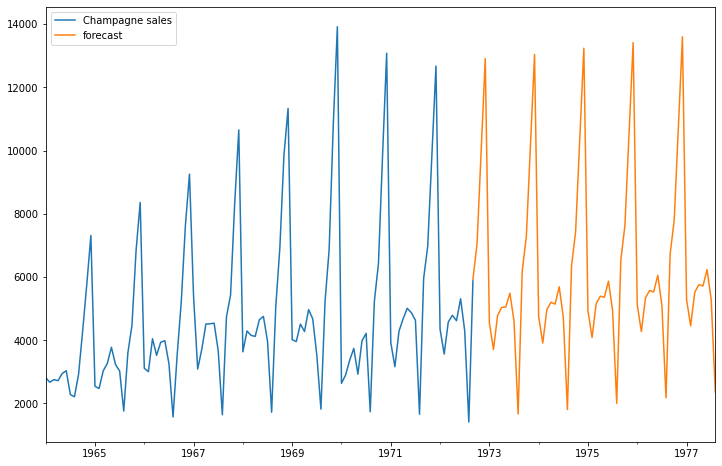

In [149]:
future_df['forecast'] = results.predict(start = 104, end = 225, dynamic= True)  
future_df[['Champagne sales', 'forecast']].plot(figsize=(12, 8)) 